# FIG2 up panel loading evidence of each models and calculating Bayes Factor

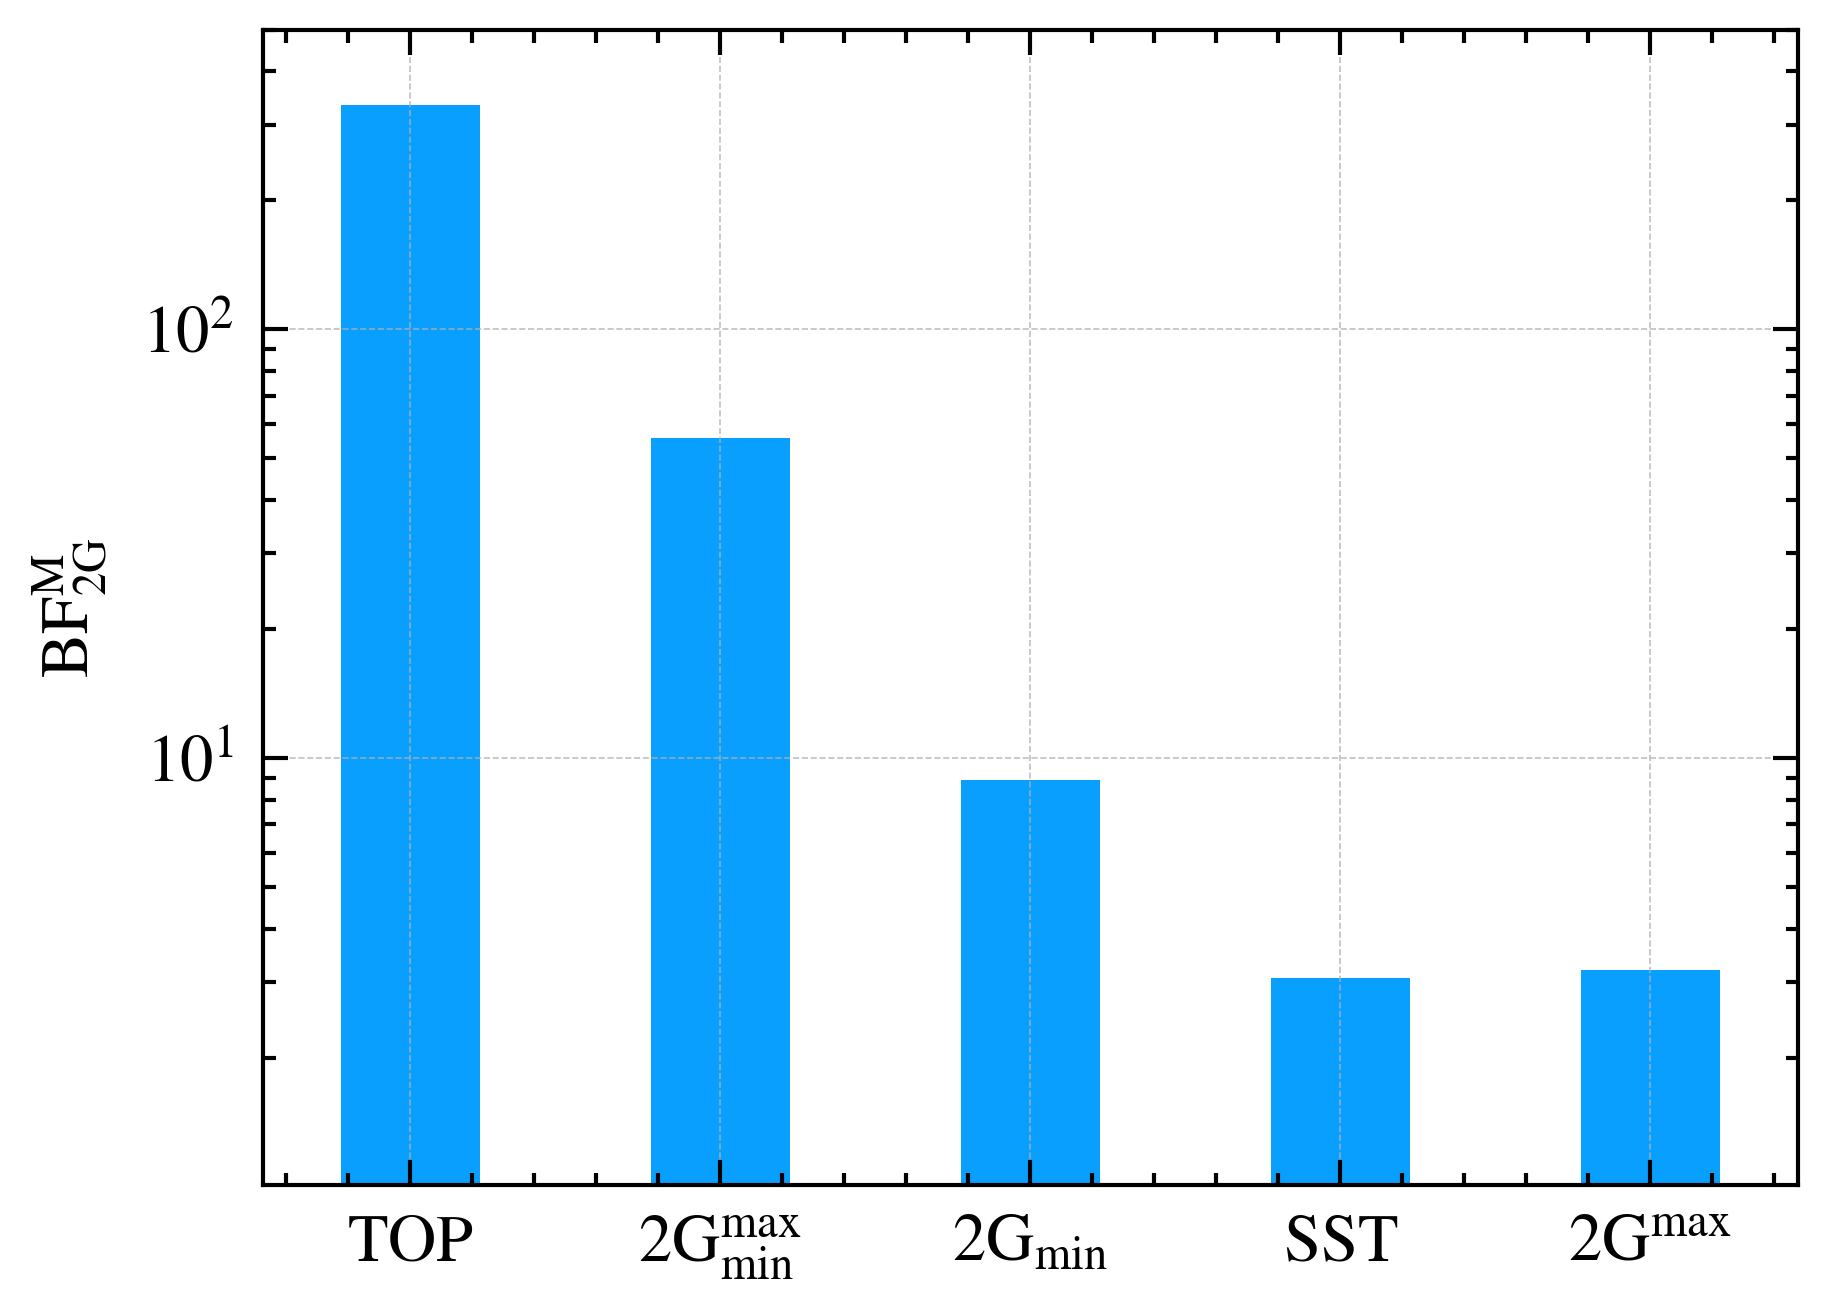

In [4]:
import bilby
import pandas as pd
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..')) 

#the label of ns mass data
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34','ana_radio']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$',r'$\rm{ANA_{radio}}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########

main_direct=parent_dir_path+'/NSmassData/posteriors/'

evi_index=[0,1,2,3,4,5,6,7]
evidence_data={}
for j in evi_index:
    evidence_data['evi_'+str(mrms_data_label[j])]=\
    pd.read_csv(main_direct + '{}/{}_evidence.csv'.format(mrms_data_label[j],mrms_data_label[j]) , index_col=None, header=None)

bf_m_2g={}
for j in [0,1,2]:
    bf_tem=evidence_data['evi_'+str(mrms_data_label[j])][1][[0,4,8,7,10]]\
    -evidence_data['evi_'+str(mrms_data_label[j])][1][11]
    bf_m_2g['bf_'+str(mrms_data_label[j])] = bf_tem

    
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
#plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

a=0
b=1
c=2
index=[r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame( {#r'$\rm{OBS}$': np.exp((bf_m_2g['bf_'+str(mrms_data_label[a])]).values), 
                   r'$\rm{ANA}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[b])]).values)},  
                   #r'$\rm{PHE}$':  np.exp((bf_m_2g['bf_'+str(mrms_data_label[c])]).values)},
                   index=index)
df11=df1.reindex([r'$\rm{TOP}$',  r'$\rm{2G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{2G^{max}}$'])
ax = df11.plot.bar(width=0.45,color= ['#089FFF','#ff7f0e','grey'])
ax.grid(which='major',linestyle='--',lw=0.2,alpha=0.8)
ax.get_legend().remove()
plt.ylim(1.01,0.5*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig(parent_dir_path+'/figures/fig2_up.pdf')

In [1]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
import corner.corner
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
#import SciencePlots 
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  
                   
j=0
one_data_difmodel_maxl=list()
data_sets={}

for i in range(len(sub_model_name_list)):
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    pos=bilby.result.read_in_result( fname )
    poss=np.array(pos.posterior.iloc[-1,:-2])
    one_data_difmodel_maxl.append(poss)
    
os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
datname=data_names[0]
data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )    

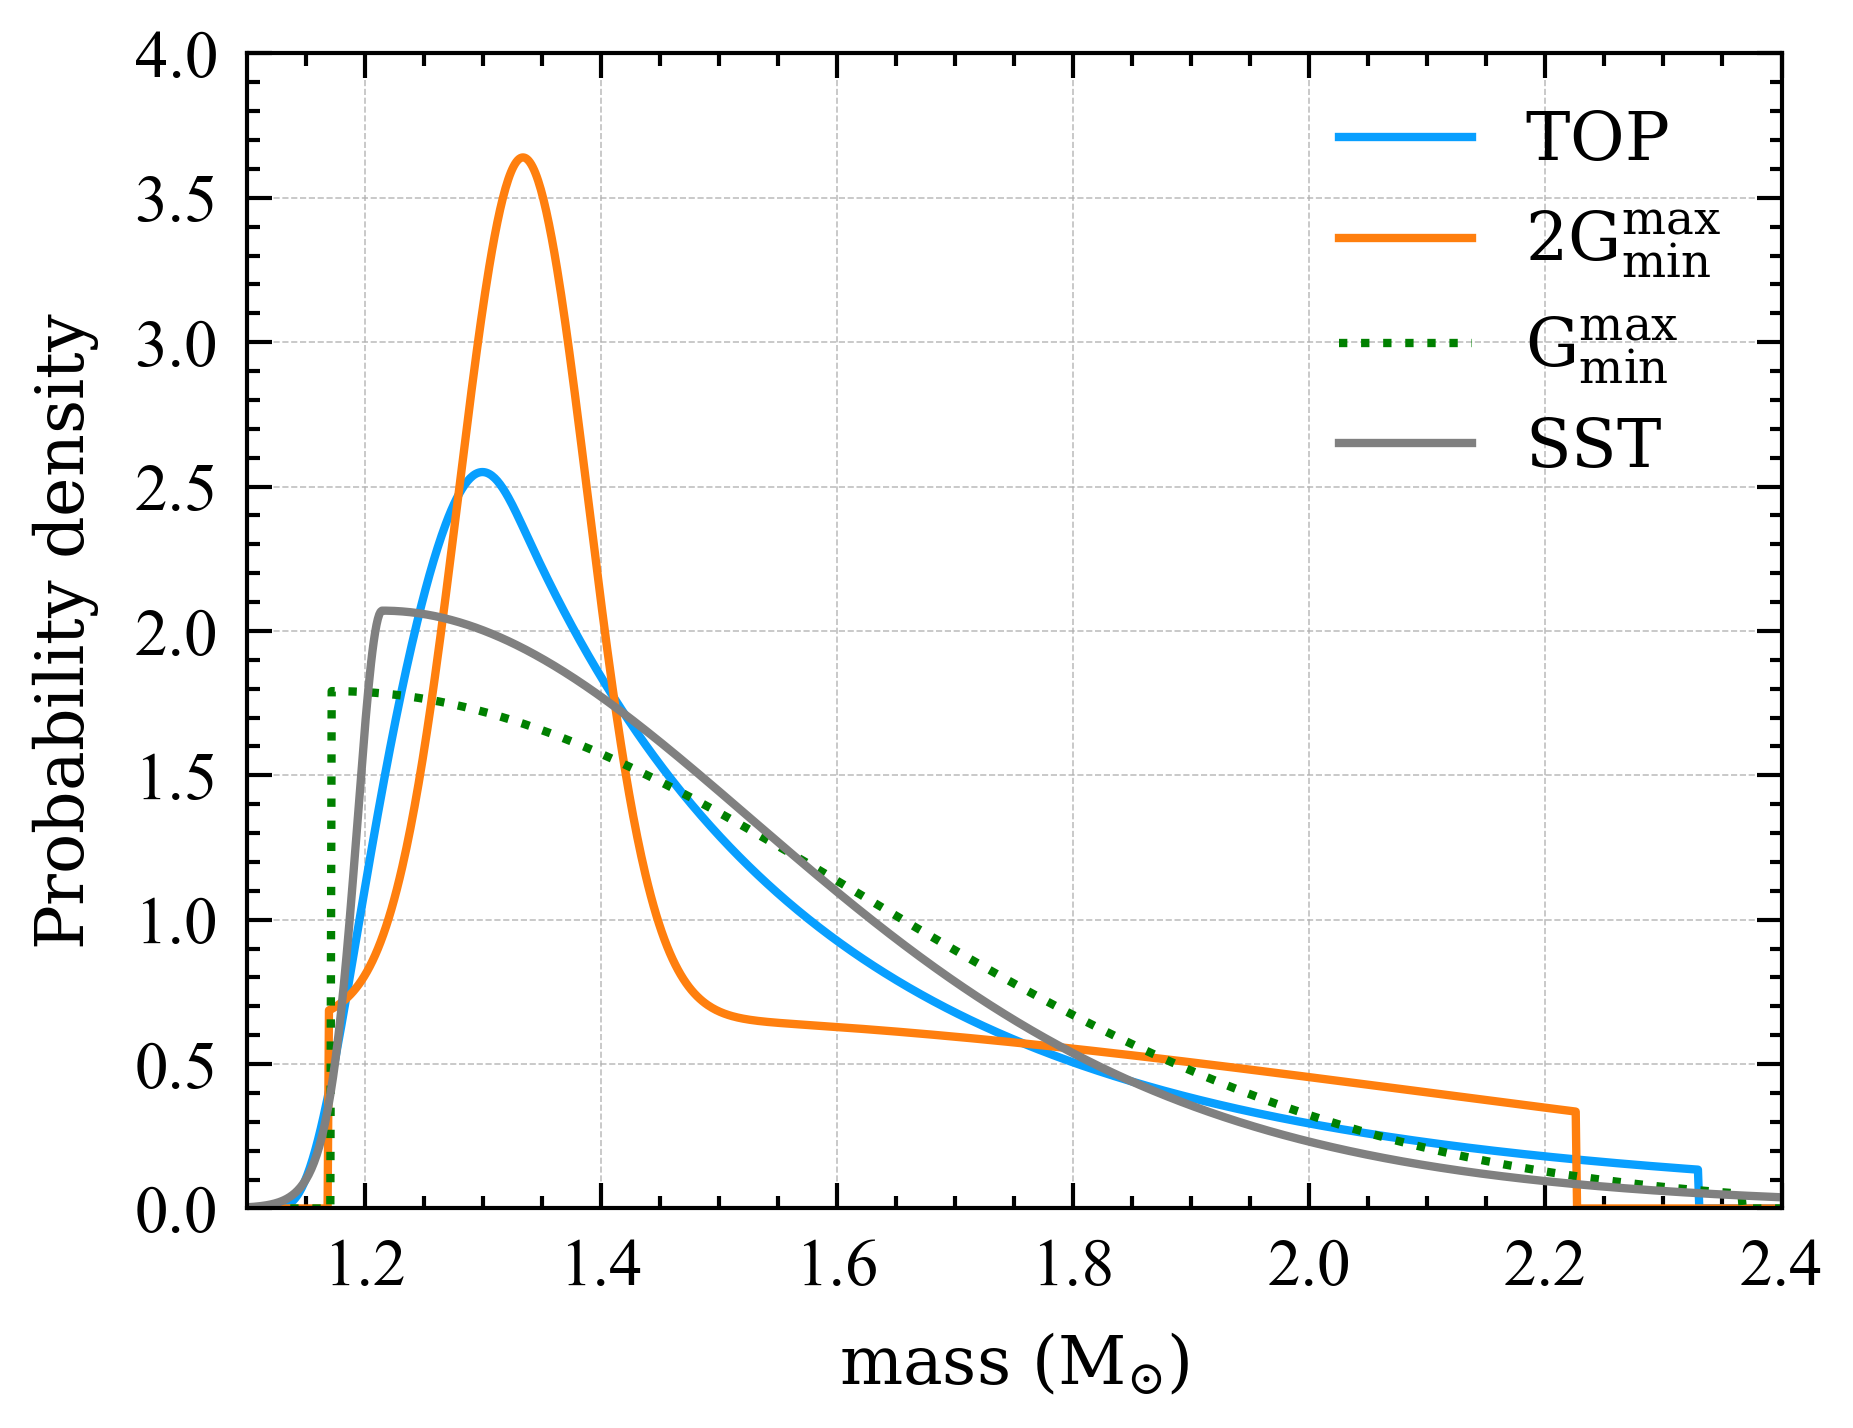

In [17]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  

set_bins=np.linspace(1.08,2.34,20)
mii=np.linspace(0.7,3,2000)
colorss=['#089FFF','#ff7f0e','green','grey','k']
lss=['-','-','dotted','-','-']

model_index=[0,4,6,8]
one_data_difmodel_maxl={}

fig2_data_xy=np.zeros( (5, len(mii)) )
fig2_data_xy[0,:]=mii

j=0
yy_m=[]
for i in model_index:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    pos=bilby.result.read_in_result( fname )
    poss=np.array(pos.posterior.iloc[-1,:-2])
    one_data_difmodel_maxl[str(sub_model_name_list[i])]=poss

    mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
    y_models=mass_model(mii,*one_data_difmodel_maxl[str(sub_model_name_list[i])] ) 

    plt.plot(mii,y_models,c=colorss[model_index.index(i)] , ls=lss[model_index.index(i)],label=r'{}'.format(model_name_label[i]) )
    fig2_data_xy[ int(model_index.index(i)) +1 , : ] = y_models

plt.grid( linestyle='--',lw=0.2,alpha=0.8)


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(1.1,2.4)
plt.ylim(0,4)
plt.legend(loc='upper right')
plt.savefig(parent_dir_path+'/figures/fig2_down.pdf')
np.savetxt('fig2_data_xy.txt',fig2_data_xy)
plt.show()